In [1]:
import requests, json

url = 'https://raw.githubusercontent.com/evgeniyako-edu/corpora/master/data/colors/xkcd.json'
response = requests.get(url)

raw_data = json.loads(response.text)


In [2]:
def hex_to_rgb(hex_color: str) -> list:
    color_hex = hex_color.lstrip('#')
    return [int(color_hex[i:i+2], base=16) for i in (0, 2, 4)]


In [ ]:
colors = dict()

for color in raw_data['colors']:
    colors[color['color']] = hex_to_rgb(color['hex'])
    

In [4]:
colors = {
    color['color']: hex_to_rgb(color['hex']) 
    for color in raw_data['colors']
}


In [9]:
colors['cloudy blue']


[172, 194, 217]

## **Plotting the data**

To have a better idea of which colors are present in our dataset, let's plot them as points in a 3D space (with Red, Green and Blue as axes).

Assign each point a color that it represents.

Hint 1: [$\texttt{scatter3D}$](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html) function from the $\texttt{matplotlib}$ library might be useful for plotting points in 3D.

Hint 2: In $\texttt{matplotlib}$, you can specify color by giving it's name from the xkcd survey with an $\texttt{'xkcd:'}$ prefix. See [documentation](https://matplotlib.org/3.1.0/tutorials/colors/colors.html) for more info.

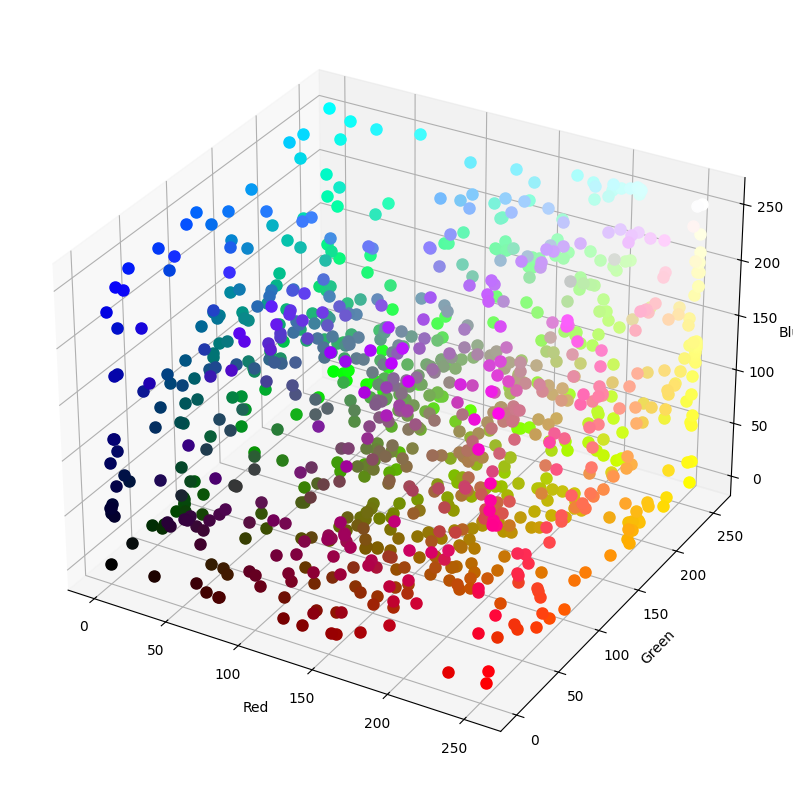

In [14]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes


fig = plt.figure(figsize=(15, 10))
ax: Axes = fig.add_subplot(projection='3d')

for color_name, (r, g, b) in colors.items():
    ax.scatter(r, g, b, color=[(r/255, g/255, b/255)], s=64)


ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show()



## **Distances between colors**

Recall that Euclidian distance between two points $x=(x_1, ..., x_n)$ and $y = (y_1, ..., y_n)$ in an $n$-dimensional space is defined as follows:

$dist(x, y) = ||x-y||_2 = \sqrt{(x_1-y_1)^2 + ... + (x_n-y_n)^2}$.

Implement a function that computed Euclidian distance between two colors in the RGB-space.

In [17]:
x_1, x_2 = colors['blue'], colors['red']

In [26]:
import numpy as np
from typing import List

def distance(x_1: List[float], x_2: List[float]) -> float:
    return np.linalg.norm(x = np.array(x_1) - np.array(x_2))


In [27]:
distance(colors['red'], colors['dark red'])

np.float64(97.0)

In [28]:
distance(colors['red'], colors['blue'])

np.float64(324.49036965678965)

In [ ]:
from typing import Dict, List

def find_n_closest(
        colors: Dict[str, List[float]], 
        new_color: List[float], 
        n: int = 5,
    ) -> List[float]:

    return sorted(
        {
            color_name: distance(new_color, color)
            for color_name, color in colors.items()
        }.items(), 
        key= lambda kv: kv[1]
    )[:n]



n = 10
new_color = [152, 70, 10]
closest = find_n_closest(colors=colors, new_color=new_color, n=n)

closest

[('burnt umber', np.float64(9.0)),
 ('warm brown', np.float64(11.489125293076057)),
 ('russet', np.float64(16.583123951777)),
 ('rust', np.float64(18.894443627691185)),
 ('cinnamon', np.float64(22.293496809607955)),
 ('auburn', np.float64(23.853720883753127)),
 ('rust brown', np.float64(25.67099530598687)),
 ('burnt sienna', np.float64(25.787593916455254)),
 ('brown red', np.float64(28.106938645110393)),
 ('raw umber', np.float64(28.319604517012593))]

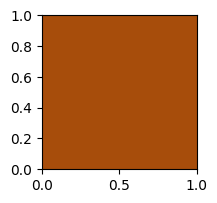

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
ax: Axes = ax

color_ = np.array(new_color)/ sum(new_color)
ax.set_facecolor(color = color_)


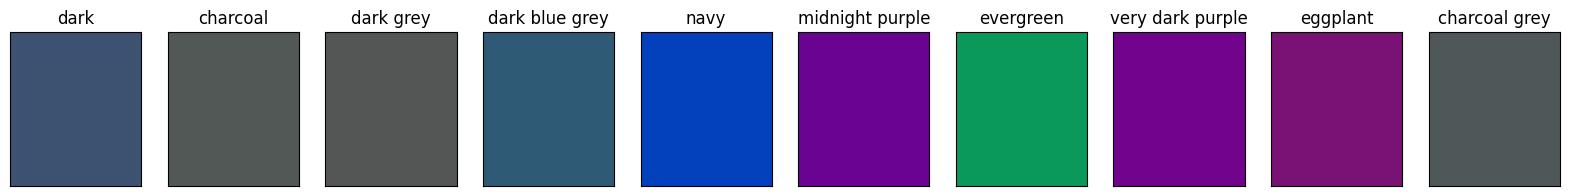

In [96]:
n = 10
figsize = (n * 2, 2)
new_color = [30, 40, 50]

closest = find_n_closest(colors=colors, new_color=new_color, n=n)

fig, axs = plt.subplots(nrows=1, ncols=n, figsize=figsize)
axs: List[Axes] = axs

for ax, color in zip(axs, closest):
    color_name = color[0]
    color = colors[color_name]

    norm = sum(color)
    r, g, b = color
    ax.set_facecolor([r/norm, g/norm, b/norm])
    
    ax.set_xticks([]); ax.set_yticks([]); ax.set_title(color_name)



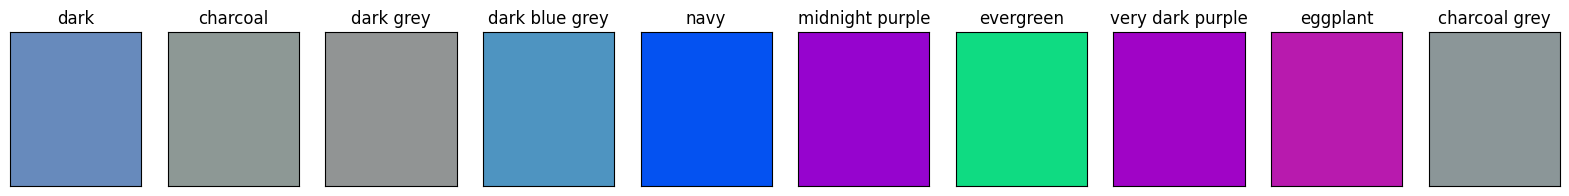

In [95]:
n = 10
figsize = (n * 2, 2)
new_color = [30, 40, 50]

closest = find_n_closest(colors=colors, new_color=new_color, n=n)


fig, axs = plt.subplots(nrows=1, ncols=n, figsize=figsize)
axs: List[Axes] = axs

for ax, color in zip(axs, closest):
    color_name = color[0]
    color = colors[color_name]

    color = np.array(colors[color_name])
    ax.set_facecolor(color/np.linalg.norm(color))
    
    ax.set_xticks([]); ax.set_yticks([]); ax.set_title(color_name)



## **Operations with color vectors**

Let's now try to perform some vector operations on the RGB-vectors.

### Vector addition

Define a function that sums up to vectors.

In [ ]:
def add_colors(color_01: List[float], color_02: List[float]) -> np.array:
    return np.array(color_01) + np.array(color_02)


array([1, 1, 0])

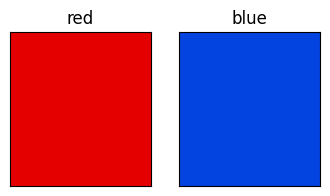

In [100]:

figsize = (4, 2)
colors = ['red', 'blue']

fig, axs = plt.subplots(nrows=1, ncols=len(colors), figsize=figsize)
axs: List[Axes] = axs

for i, color in enumerate(colors):
    axs[i].set_facecolor('xkcd:' + color)
    axs[i].set_xticks([]); axs[i].set_yticks([]); axs[i].set_title(color)



## **References**

This notebook is inspired by a [tutorial by Allison Parrish](https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469).